# Initialisation

## Import libraries and modules

In [1]:
import pandas as pd
import numpy as np

from neural_network import Neural_Network
from data_visualisation import *

%matplotlib inline

## Import data

In [2]:
data_set = pd.read_excel("../data/data-1000.xlsx")
data_set.describe()


,X1,X2,Y1,Y2,Y3,Y4,Y5,Y6,Y7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.495415,0.488203,3.489544,0.508000,32.514257,0.827478,0.997393,0.698587,0.818000
std,0.282464,0.287044,2.947580,0.500186,28.873941,2.286598,0.709337,0.140474,0.386038
min,0.000306,0.000469,-2.646325,0.000000,0.000009,-2.421760,0.000003,0.500239,0.000000
25%,0.259234,0.246332,1.101270,0.000000,6.720253,-0.649771,0.288039,0.574929,1.000000
50%,0.499823,0.483463,3.495832,1.000000,24.982317,0.041473,1.000070,0.674099,1.000000
75%,0.731668,0.739346,5.922186,1.000000,53.533822,1.879441,1.702205,0.802355,1.000000
max,0.999620,0.999043,9.953752,1.000000,99.923920,9.856971,1.999963,0.999531,1.000000


## Extracting the useful data

In [3]:
def extract_features(data_set, *argv):
    features_names = []
    for feature in argv:
        features_names.append(feature)
        
    features_df = data_set[features_names]
    features_matrix = features_df.to_numpy()
    features_matrix = np.transpose(features_matrix)
    
    total_set_size = features_matrix.shape[1]
    train_set_size = int(0.8*total_set_size)
    
    features_train = features_matrix[:, :train_set_size]
    features_test = features_matrix[:, train_set_size:]
    
    return features_train, features_test

In [4]:
X1_train, X1_test = extract_features(data_set, "X1")
X2_train, X2_test = extract_features(data_set, "X2")
X1X2_train, X1X2_test = extract_features(data_set, "X1", "X2")

Y1_train, Y1_test = extract_features(data_set, "Y1")
Y2_train, Y2_test = extract_features(data_set, "Y2")
Y3_train, Y3_test = extract_features(data_set, "Y3")
Y4_train, Y4_test = extract_features(data_set, "Y4")
Y5_train, Y5_test = extract_features(data_set, "Y5")
Y6_train, Y6_test = extract_features(data_set, "Y6")
Y7_train, Y7_test = extract_features(data_set, "Y7")

In [5]:
print(X1X2_train.shape)

(2, 800)


# Test 0: Identity function

## Creating the neural network

In [6]:
neurons_per_layer_00 = [1, 2, 1]
lr_00 = 0.1

nn_00 = Neural_Network(neurons_per_layer_00, lr_00)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


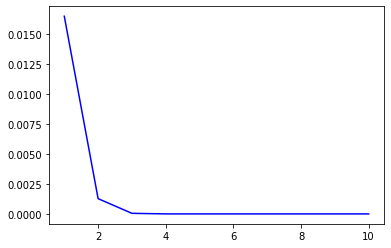

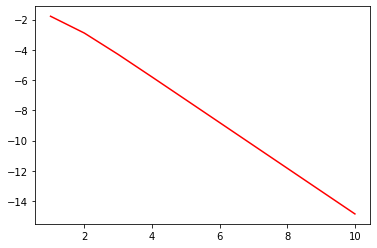

In [7]:
cost_list_00 = nn_00.fit(X1_train, X1_train, X1_test, X1_test, 10, 10)

print_cost(cost_list_00)
print_cost_log(cost_list_00)

## Show result

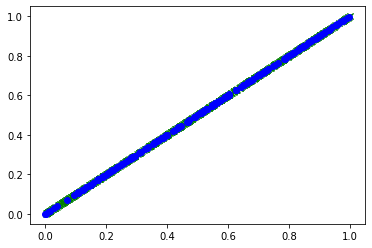

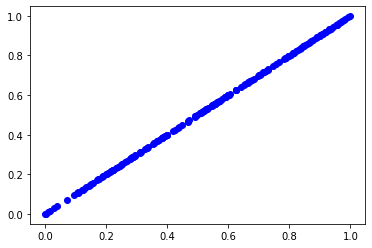

In [8]:
Y_test_pred_00 = nn_00.predict(X1_test)

print_regression(X1_train, X1_train, X1_test, X1_test, Y_test_pred_00)

## Indivual tests

In [9]:
x_00 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5]])
y_p_00 = nn_00.predict(x_00)

print(y_p_00)

[[0.10000005 0.20000004 0.30000003 0.40000001 0.5       ]]


# Test 1: $10X_1 - 3X_2$

## Creating the neural network

In [10]:
neurons_per_layer_01 = [2, 2, 2, 1]
lr_01 = 0.01

nn_01 = Neural_Network(neurons_per_layer_01, lr_01)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


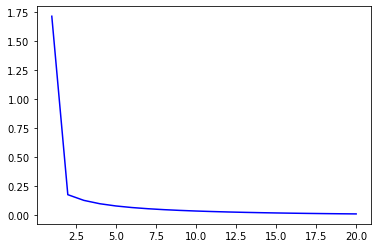

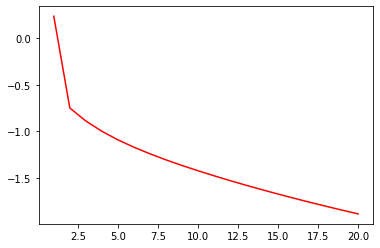

In [11]:
cost_list_01 = nn_01.fit(X1X2_train, Y1_train, X1X2_test, Y1_test, 20)

print_cost(cost_list_01)
print_cost_log(cost_list_01)

In [12]:
Y_test_pred_01 = nn_01.predict(X1X2_test)

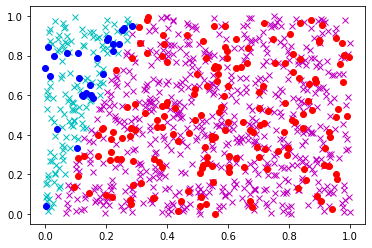

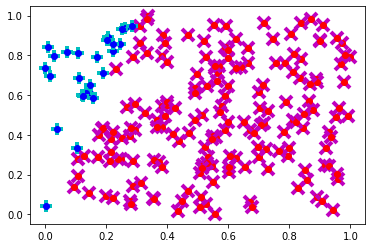

In [13]:
print_classification(X1X2_train, Y1_train, X1X2_test, Y1_test, Y_test_pred_01, 0.1)

## Manual tests

In [14]:
x_01 = np.array([[0.1, 0.2, 0.3], 
              [0.4, 0.5, 0.6]])
y_p_01 = nn_01.predict(x_01)
y_01 = 10*x_01[0] - 3*x_01[1]

print(y_p_01)
print(y_01)

[[-0.20931941  0.49333754  1.19599449]]
[-0.2  0.5  1.2]


# Test 2: $X_1 \geq X_2$

## Creating the neural network

In [15]:
neurons_per_layer_02 = [2, 2, 2, 1]
lr_02 = 0.05

nn_02 = Neural_Network(neurons_per_layer_02, lr_02)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


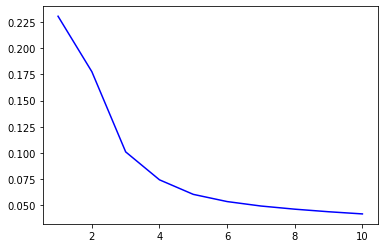

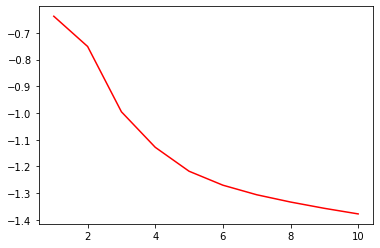

In [16]:
cost_list_02 = nn_02.fit(X1X2_train, Y2_train, X1X2_test, Y2_test, 10)

print_cost(cost_list_02)
print_cost_log(cost_list_02)

In [17]:
Y_test_pred_02 = nn_02.predict(X1X2_test)

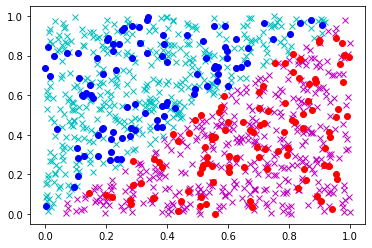

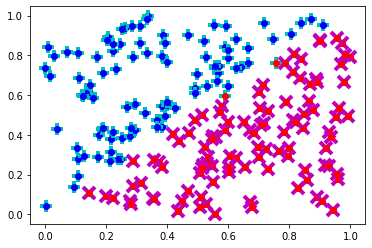

In [18]:
print_classification(X1X2_train, Y2_train, X1X2_test, Y2_test, Y_test_pred_02, 0.5)

## Manual tests

In [19]:
x_02 = np.array([[0.1, 0.4, 0.5, 0.8, 0.501, 0.9, 0.1], 
                 [0.2, 0.3, 0.6, 0.7, 0.50, 0.1, 0.9]])
y_p_02 = nn_02.predict(x_02)
y_02 = x_02[0] >= x_02[1]

print(y_p_02)
print(y_p_02 >= 0.5)
print(y_02)

[[ 0.3061218   0.75197828  0.31632203  0.76217851  0.53764171  1.18181577
  -0.23031723]]
[[False  True False  True  True  True False]]
[False  True False  True  True  True False]


# Test 3: $100*(X_1)^2$

## Creating the neural network

In [20]:
neurons_per_layer_03 = [1, 2, 2, 1]
lr_03 = 0.0005

nn_03 = Neural_Network(neurons_per_layer_03, lr_03)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


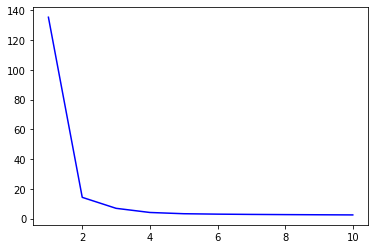

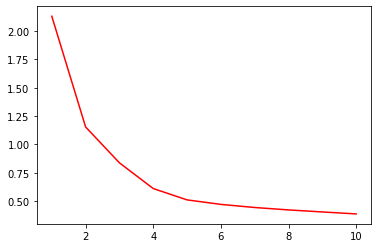

In [21]:
cost_list_03 = nn_03.fit(X1_train, Y3_train, X1_test, Y3_test, 10)

print_cost(cost_list_03)
print_cost_log(cost_list_03)

## Show results

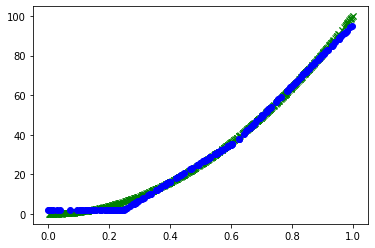

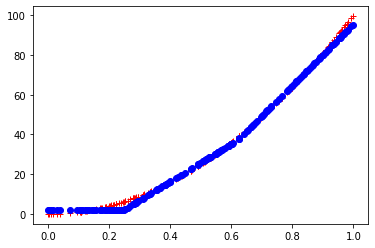

In [22]:
Y_test_pred_03 = nn_03.predict(X1_test)

print_regression(X1_train, Y3_train, X1_test, Y3_test, Y_test_pred_03)

## Manual tests

In [23]:
x_03 = np.array([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]])
y_p_03 = nn_03.predict(x_03)
y_03 = 100*x_03*x_03


for u, v in zip(y_p_03[0], y_03[0]):
    print(f"{u: .2f} -- {int(v)}")

 1.95 -- 0
 1.95 -- 1
 1.95 -- 4
 6.88 -- 9
 16.30 -- 16
 25.72 -- 25
 35.15 -- 36
 49.32 -- 49
 64.72 -- 64
 80.13 -- 81
 95.53 -- 100


# Test 4: $10*X_1(X_1 - X_2)$

## Creation of the neural network

In [24]:
neurons_per_layer_04 = [2, 2, 2, 1]
lr_04 = 0.05

nn_04 = Neural_Network(neurons_per_layer_04, lr_04)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


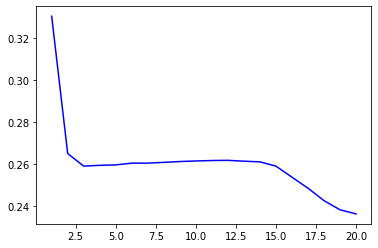

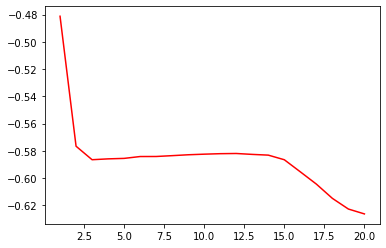

In [25]:
cost_list_04 = nn_04.fit(X1X2_train, Y4_train, X1X2_test, Y4_test, 20)

print_cost(cost_list_04)
print_cost_log(cost_list_04)

In [26]:
import numpy as np

print(cost_list_04[-1])
print(np.log10(cost_list_04[-1]))

0.23638007311672102
-0.6263891373517465


## Show results

In [27]:
Y_test_pred_04 = nn_04.predict(X1X2_test)

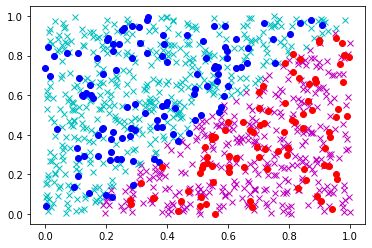

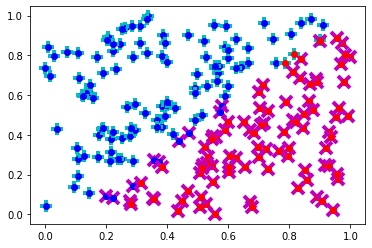

In [28]:
print_classification(X1X2_train, Y4_train, X1X2_test, Y4_test, Y_test_pred_04, 0.2)

## Manual tests

In [29]:
x_04 = np.array([[0,   0.3, 0.4, 0.7, 0.8],
                [0.1, 0.2, 0.5, 0.6, 0.9]])

y_p_04 = nn_04.predict(x_04)
y_04 = 10*x_04[0]*x_04[0] - 10*x_04[0]*x_04[1]

for u, v in zip(y_p_04[0], y_04):
    print(f"{u: .3f} -- {v: .3f}")

-0.847 --  0.000
-0.115 --  0.300
-0.847 -- -0.400
 0.580 --  0.700
-0.465 -- -0.800


# Test 5: $1 + \sin(2\pi X_1)$

## Creation of the neural network

In [90]:
neurons_per_layer_05 = [1, 4, 4, 4, 4, 1]
lr_05 = 0.002

nn_05 = Neural_Network(neurons_per_layer_05, lr_05)

## Training

Progression: 10%
Progression: 20%
Progression: 30%
Progression: 40%
Progression: 50%
Progression: 60%
Progression: 70%
Progression: 80%
Progression: 90%
Progression: 100%


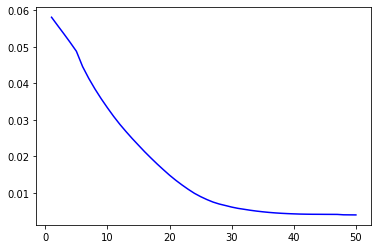

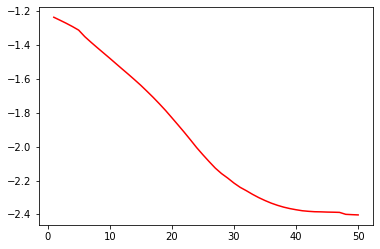

In [94]:
cost_list_05 = nn_05.fit(X1_train, Y5_train, X1_test, Y5_test, 50, batch_size=1)

print_cost(cost_list_05)
print_cost_log(cost_list_05)

In [93]:
import numpy as np
#[1, 4, 4, 4, 4, 1], 
# lr: 0.01, 
#epoch: 20
#batch: 1
print(cost_list_05[-1]) #0.032
print(np.log10(cost_list_05[-1])) #-1.5

0.05828069775808056
-1.2344752573366722


## Show results

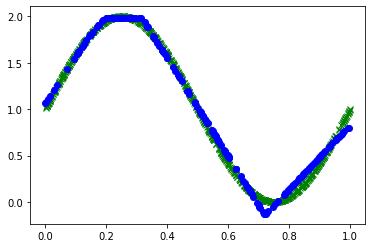

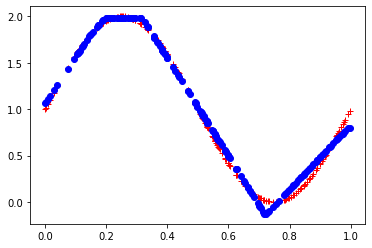

In [95]:
Y_test_pred_05 = nn_05.predict(X1_test)

print_regression(X1_train, Y5_train, X1_test, Y5_test, Y_test_pred_05)

## Manual tests

In [34]:
import numpy as np

x_05 = np.array([[i/12 for i in range(12)]])
y_p_05 = nn_05.predict(x_05)
y_05 = 1 + np.sin(2*np.pi*x_05)


for u, v in zip(y_p_05[0], y_05[0]):
    print(f"{u: .2f} -- {v: .2f}")

 1.72 --  1.00
 1.67 --  1.50
 1.62 --  1.87
 1.58 --  2.00
 1.42 --  1.87
 1.23 --  1.50
 1.03 --  1.00
 0.83 --  0.50
 0.63 --  0.13
 0.43 --  0.00
 0.23 --  0.13
 0.04 --  0.50


In [35]:
#neurons_per_layer_03 = [1, 2, 2, 1]
#lr_03 = 0.0005

#nn_03 = Neural_Network(neurons_per_layer_03, lr_03)


#cost_list_03 = nn_03.fit(X1_train, Y3_train, X1_test, Y3_test, 10)

#print_cost(cost_list_03)
#print_cost_log(cost_list_03)


#Y_test_pred_03 = nn_03.predict(X1_test)

#print_regression(X1_train, Y3_train, X1_test, Y3_test, Y_test_pred_03, nn_03)


#x_03 = np.array([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]])
#y_p_03 = nn_03.predict(x_03)
#y_03 = 100*x_03*x_03


#for u, v in zip(y_p_03[0], y_03[0]):
#    print(f"{u: .2f} -- {int(v)}")